In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

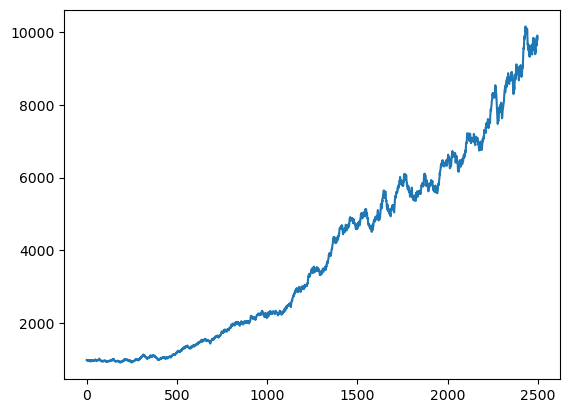

In [2]:

# Create random walk sampled from normal distribution
np.random.seed(65)
random_walk = np.random.normal(loc=0.001, scale=0.01, size=2500)
random_walk = pd.Series(random_walk)

# Create price path
random_prices = random_walk.add(1).cumprod()

# Plot
random_prices.mul(1000).plot()
plt.show()

In [3]:

# Create random walk sampled from actual stock returns
fb = pd.read_csv('data/stock_data/fb.csv', names=['Date','Price'], parse_dates=['Date'], index_col='Date')
fb.head()

,Price
Date,
2012-05-17,38.00
2012-05-18,38.23
2012-05-21,34.03
2012-05-22,31.00
2012-05-23,32.00


/Users/nyashamasamba/anaconda3/envs/rules_vs_random/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


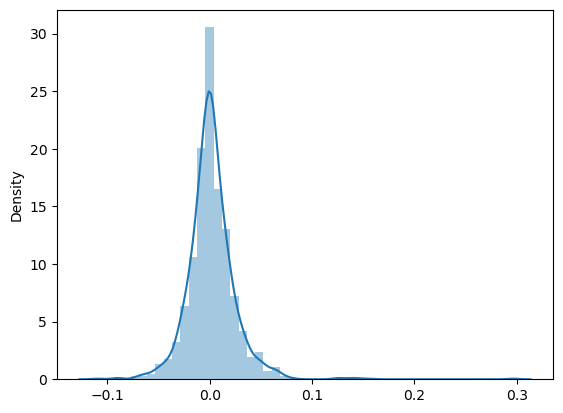

In [4]:

daily_returns = fb.pct_change().dropna()
n_obs = daily_returns.size

# Create random_walk
daily_returns = daily_returns.to_numpy().flatten()
random_walk = np.random.choice(daily_returns, size=n_obs)
random_walk = pd.Series(random_walk, index=fb.index[1:])

# Plot random_walk distribution
sns.distplot(random_walk)
plt.show()

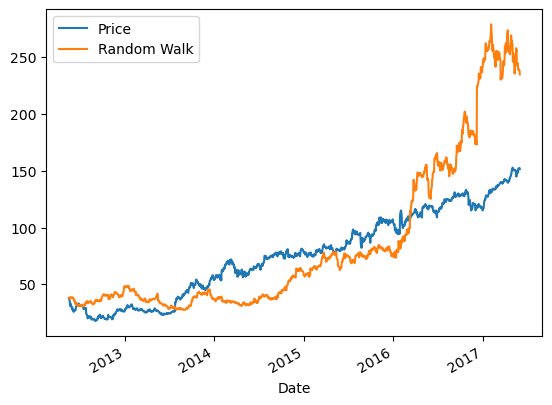

In [5]:

# Create price path
start = fb['Price'].first('D') # select a price from which to begin random walk
random_walk = random_walk.add(1)

random_price = start.append(random_walk)
random_price = random_price.cumprod()

# Insert into fb and plot
fb['Random Walk'] = random_price
fb.plot()
plt.show()